In [2]:
import os
import collections
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path

import sys
sys.path.append("../src")
#importlib.reload(conversion_mat_to_py)
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple


In [3]:
caminho = '/Users/User/OneDrive/TCC/MoVi/IMUmatlab_Subject/'
imu_filename = caminho + 'imu_Subject_1.mat'

In [4]:
# Reading MoVi files as a Python dictionary
sample = mat2dict(imu_filename)
sample.keys()

dict_keys(['S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2'])

In [5]:
pretty_dict(sample, print_type=False, indent=1)

	Key: S1_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: S2_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: I1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: I2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescript

In [6]:
# Nome das juntas onde estão os sensores
jointNames = sample['S2_Synched']['jointNames']

# Número das juntas onde estão os sensores
jointNumbers = sample['S2_Synched']['jointNumbers']

# Dados
Data = sample['S2_Synched']['data']

In [7]:
print(jointNames)
print(jointNumbers)

['Hip' 'RightUpLeg' 'RightLeg' 'RightFoot' 'LeftUpLeg' 'LeftLeg'
 'LeftFoot' 'RightShoulder' 'RightArm' 'RightForeArm' 'RightHand'
 'LeftShoulder' 'LeftArm' 'LeftForeArm' 'LeftHand' 'Head' 'Neck' 'Spine3'
 'Spine2' 'Spine1' 'Spine']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21']


In [8]:
# Tipos de dados para cada sensor
print(sample['S2_Synched']['dataTypes'])
print(sample['S2_Synched']['dataTypesDescription'])


['X' 'V' 'Q' 'A' 'W']
['Displacement (meter)' 'Speed (meter per second)'
 'Posture data (Quaternions)' 'Acceleration (g)'
 'Angular velocity (radian per second)']


In [9]:
dataHeader_filename = caminho + 'dataHeader.mat'
dataHeader = sio.loadmat(dataHeader_filename)
pretty_dict(dataHeader, print_type=False, indent=1)

	Key: __header__
	Key: __version__
	Key: __globals__
	Key: None
	Key: __function_workspace__


In [10]:
dataHeader['None']

MatlabOpaque([(b'x', b'MCOS', b'string', array([[3707764736],
       [         2],
       [         1],
       [         1],
       [         1],
       [         1]], dtype=uint32))],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

In [11]:
header = pd.read_csv(caminho + 'columns.csv', sep=';')
header = header[:].values.tolist()

In [12]:
data = pd.DataFrame(Data, columns=header)
data.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,21-Q-s,21-Q-x,21-Q-y,21-Q-z,21-A-x,21-A-y,21-A-z,21-W-x,21-W-y,21-W-z
0,0.031078,0.056503,-0.0118,-0.011616,0.000556,0.007377,-0.123424,0.705,0.137418,0.684787,...,1.0,0.0,0.0,0.0,-0.981378,0.003906,0.237357,-0.016800,1.577233e-12,0.001291
1,0.030993,0.056499,-0.0118,-0.012510,0.001541,0.007329,-0.123510,0.705,0.137535,0.684687,...,1.0,0.0,0.0,0.0,-0.985008,0.003877,0.234089,-0.018674,-4.283233e-13,-0.005389
2,0.030984,0.056501,-0.0118,-0.013123,0.002509,0.007103,-0.123497,0.705,0.137608,0.684704,...,1.0,0.0,0.0,0.0,-0.983369,0.003989,0.234174,-0.012947,1.161375e-13,-0.014780
3,0.030861,0.056498,-0.0118,-0.012298,-0.001319,0.007391,-0.123500,0.705,0.137598,0.684699,...,1.0,0.0,0.0,0.0,-0.979803,0.003554,0.235767,0.001808,-3.144365e-14,0.002313
4,0.030797,0.056507,-0.0118,-0.013124,0.000015,0.007484,-0.123502,0.705,0.137601,0.684700,...,1.0,0.0,0.0,0.0,-0.981956,0.005350,0.237266,-0.000481,8.501267e-15,-0.000654


In [13]:
data_01 = data.iloc[500:1200,:16]
data_01.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,01-A-x,01-A-y,01-A-z,01-W-x,01-W-y,01-W-z
500,0.021125,0.050423,-0.012470,0.001051,0.003724,0.007532,-0.121388,0.709799,0.136588,0.680302,-0.984813,0.002748,0.219240,3.047638e-10,-0.017171,-0.000596
501,0.021204,0.050512,-0.012415,0.000837,0.003683,0.007374,-0.121403,0.709806,0.136602,0.680294,-0.984486,0.000575,0.218403,-8.294836e-11,-0.018818,0.000162
502,0.021223,0.050491,-0.012513,0.002077,0.004584,0.007244,-0.121399,0.709774,0.136605,0.680326,-0.983515,0.004386,0.220079,2.320634e-11,-0.011961,-0.000044
503,0.021313,0.050528,-0.012497,0.003836,0.004523,0.007295,-0.121401,0.709690,0.136573,0.680410,-0.979746,0.003849,0.222048,-9.047347e-12,-0.002591,0.000012
504,0.021290,0.050610,-0.012499,0.000600,0.003618,0.007659,-0.121398,0.709703,0.136489,0.680397,-0.982037,0.003604,0.218284,1.311203e-11,-0.020995,-0.000003


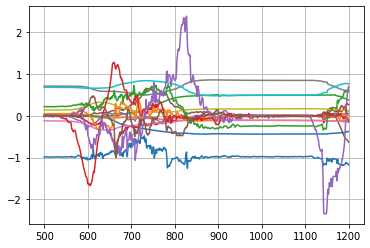

In [14]:
plt.plot(data_01.index, data_01.values)
plt.grid()
plt.show()

In [15]:
data_01_X = data.iloc[500:1200,:3]
data_01_X.head()

,01-X-x,01-X-y,01-X-z
500,0.021125,0.050423,-0.012470
501,0.021204,0.050512,-0.012415
502,0.021223,0.050491,-0.012513
503,0.021313,0.050528,-0.012497
504,0.021290,0.050610,-0.012499


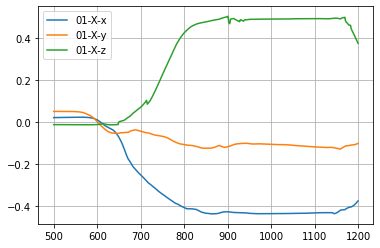

In [16]:
plt.plot(data_01_X.index, data_01_X.values)
plt.grid()
plt.legend(('01-X-x',
  '01-X-y',
  '01-X-z'))
plt.show()

In [17]:
data_01_V = data.iloc[500:1200,3:6]
data_01_V.head()

,01-V-x,01-V-y,01-V-z
500,0.001051,0.003724,0.007532
501,0.000837,0.003683,0.007374
502,0.002077,0.004584,0.007244
503,0.003836,0.004523,0.007295
504,0.000600,0.003618,0.007659


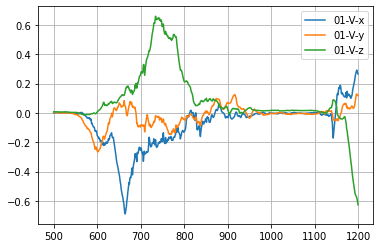

In [18]:
plt.plot(data_01_V.index, data_01_V.values)
plt.grid()
plt.legend(('01-V-x',
  '01-V-y',
  '01-V-z'))
plt.show()

In [19]:
data_01_Q = data.iloc[500:1200,6:10]
data_01_Q.head()

,01-Q-s,01-Q-x,01-Q-y,01-Q-z
500,-0.121388,0.709799,0.136588,0.680302
501,-0.121403,0.709806,0.136602,0.680294
502,-0.121399,0.709774,0.136605,0.680326
503,-0.121401,0.709690,0.136573,0.680410
504,-0.121398,0.709703,0.136489,0.680397


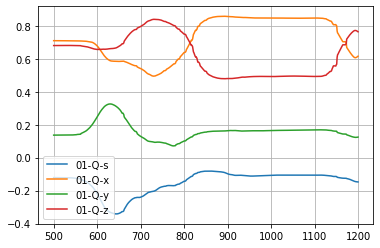

In [20]:
plt.plot(data_01_Q.index, data_01_Q.values)
plt.grid()
plt.legend(('01-Q-s',
  '01-Q-x',
  '01-Q-y',
  '01-Q-z'))
plt.show()

In [21]:
data_01_A = data.iloc[500:1200,10:13]
data_01_A.head()

,01-A-x,01-A-y,01-A-z
500,-0.984813,0.002748,0.219240
501,-0.984486,0.000575,0.218403
502,-0.983515,0.004386,0.220079
503,-0.979746,0.003849,0.222048
504,-0.982037,0.003604,0.218284


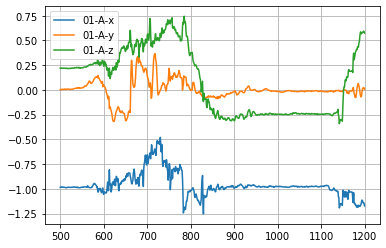

In [22]:
plt.plot(data_01_A.index, data_01_A.values)
plt.grid()
plt.legend(('01-A-x',
  '01-A-y',
  '01-A-z'))
plt.show()

In [23]:
data_01_W = data.iloc[500:1200,13:16]
data_01_W.head()

,01-W-x,01-W-y,01-W-z
500,3.047638e-10,-0.017171,-0.000596
501,-8.294836e-11,-0.018818,0.000162
502,2.320634e-11,-0.011961,-0.000044
503,-9.047347e-12,-0.002591,0.000012
504,1.311203e-11,-0.020995,-0.000003


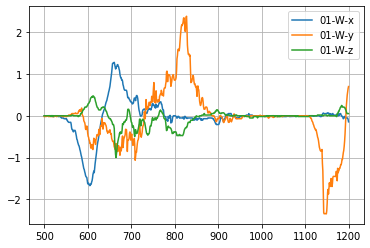

In [24]:
plt.plot(data_01_W.index, data_01_W.values)
plt.grid()
plt.legend(('01-W-x',
  '01-W-y',
  '01-W-z'))
plt.show()

## Abrindo todos os dados 'S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2'

In [25]:
S1_Synched = sample['S1_Synched']['data']
S2_Synched = sample['S2_Synched']['data']
S1 = sample['S1']['data']
S2 = sample['S2']['data']
I1 = sample['I1']['data']
I2 = sample['I2']['data']

In [27]:
S1_Synched = S1_Synched[:,6:10]
S2_Synched = S2_Synched[:,6:10]
S1 = S1[:,6:10]
S2 = S2[:,6:10]
I1 = I1[:,6:10]
I2 = I2[:,6:10]

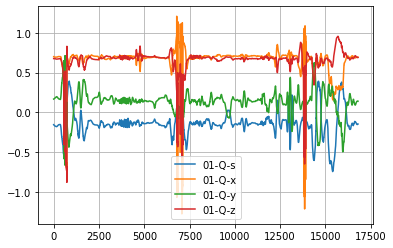

In [29]:
plt.plot(S1_Synched)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

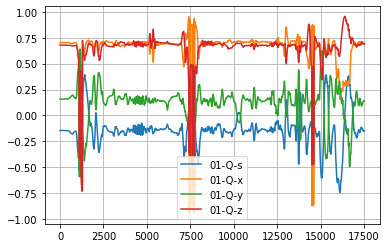

In [30]:
plt.plot(S1)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

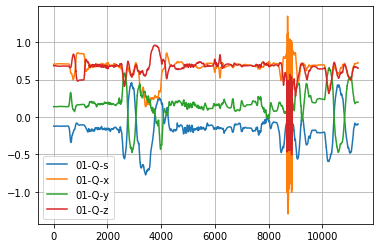

In [31]:
plt.plot(S2_Synched)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

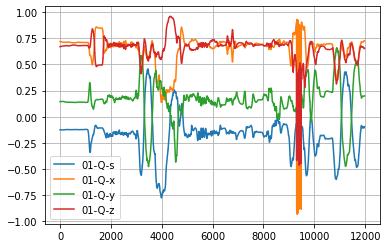

In [32]:
plt.plot(S2)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

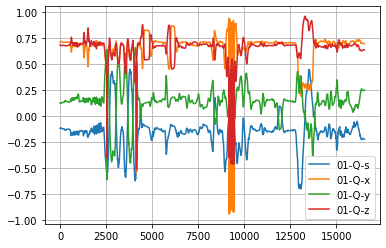

In [33]:
plt.plot(I1)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

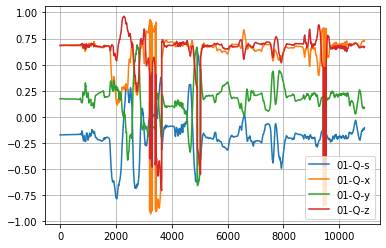

In [34]:
plt.plot(I2)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()